In [1]:
#My default packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from dataclasses import dataclass
import itertools
import heapq


# Day 17

In [155]:
piecesstr = """####

.#.
###
.#.

..#
..#
###

#
#
#
#

##
##""".replace('.',' ').split("\n\n")

def getwind(file):
    with open(file) as f:
        return list(f.read().rstrip())

In [67]:
@dataclass 
class Point:
    x:int
    y:int

    def __repr__(self) -> str:
        return f"({self.x},{self.y})"

    def __add__(a,b):
        return Point(a.x+b.x,a.y+b.y)

    def __sub__(a,b):
        return Point(a.x-b.x,a.y-b.y)

    def __hash__(self) -> int:
        return hash((self.x,self.y))

class Moves:
    def __init__(self) -> None:
        self.left = Point(-1,0)
        self.right = Point(1,0)
        self.down = Point(0,-1)



In [169]:
class PebblePile:
    def __init__(self,points):
        self.elements = set(points)
    
    def __repr__(self) -> str:
        return f"PebblePile({self.elements.__repr__()}"

    @classmethod
    def makeVent(cls):
        return cls(Point(k,0) for k in range(7))

    @classmethod
    def makeRock(cls,origin:Point,shape:str):
        return cls(set(Point(j,i)+origin for i,l in enumerate(shape.splitlines()[::-1]) for j,c in enumerate(l) if c=="#"))


    def __add__(self,a):
        if isinstance(a,Point):
            return PebblePile(s+a for s in self.elements)
        else: raise NotImplementedError

    def __and__(self,other):
        return self.elements&other.elements

    def ismovelegal(self,m,vent,limits=(0,7)):
        new = self+m
        xm,xM = limits
        if new.xmin()>=xm and new.xmax()<xM and len(new&vent)==0:
            # self += m Don't know why this does not work
            return True
        else:
            return False

    def merge(self,rock):
        self.elements.update(rock.elements)

    def xmin(self):
        return min(p.x for p in self.elements)

    def xmax(self):
        return max(p.x for p in self.elements)
    
    def ymax(self):
        return max(p.y for p in self.elements)

    def spawnpoint(self):
        return Point(2,self.ymax()+4)


    





In [390]:
def playTetris(N,piecesstr,wind=None,Vent=None,repeatwind=False,rock=None):
    move = Moves()
    if Vent is None:
        Vent = PebblePile.makeVent()
    cycle = len(piecesstr)
    windcycle = len(wind)
    if wind is None: wind=[]
    kw = 0
    for n in range(N):
        spawn = Vent.spawnpoint()
        if rock is None:
            rock = PebblePile.makeRock(spawn,piecesstr[n%cycle])
        falling =True
        while falling:
            if repeatwind:
                w=wind[kw%windcycle]
            else:
                try:
                    w=wind[kw]
                except IndexError:
                    # Vent.merge(rock)
                    return Vent,n,rock

            kw+=1
            if w =="<":
                if rock.ismovelegal(move.left,Vent):
                    rock+=move.left

            elif w==">":
                if rock.ismovelegal(move.right,Vent):
                    rock+=move.right
            if falling := rock.ismovelegal(move.down,Vent):
                rock+=move.down
            else:
                Vent.merge(rock)
        rock = None


    return Vent,n,None

In [187]:
exwind= ">>><<><>><<<>><>>><<<>>><<<><<<>><>><<>>"

In [189]:
vent = playTetris(2022,piecesstr,exwind)
vent.ymax()

In [233]:
wind = getwind("input17.txt")
vent,N = playTetris(2022,piecesstr,wind,repeatwind=True)
vent.ymax()

3133

In [245]:
Ntwo = 1_000_000_000_000

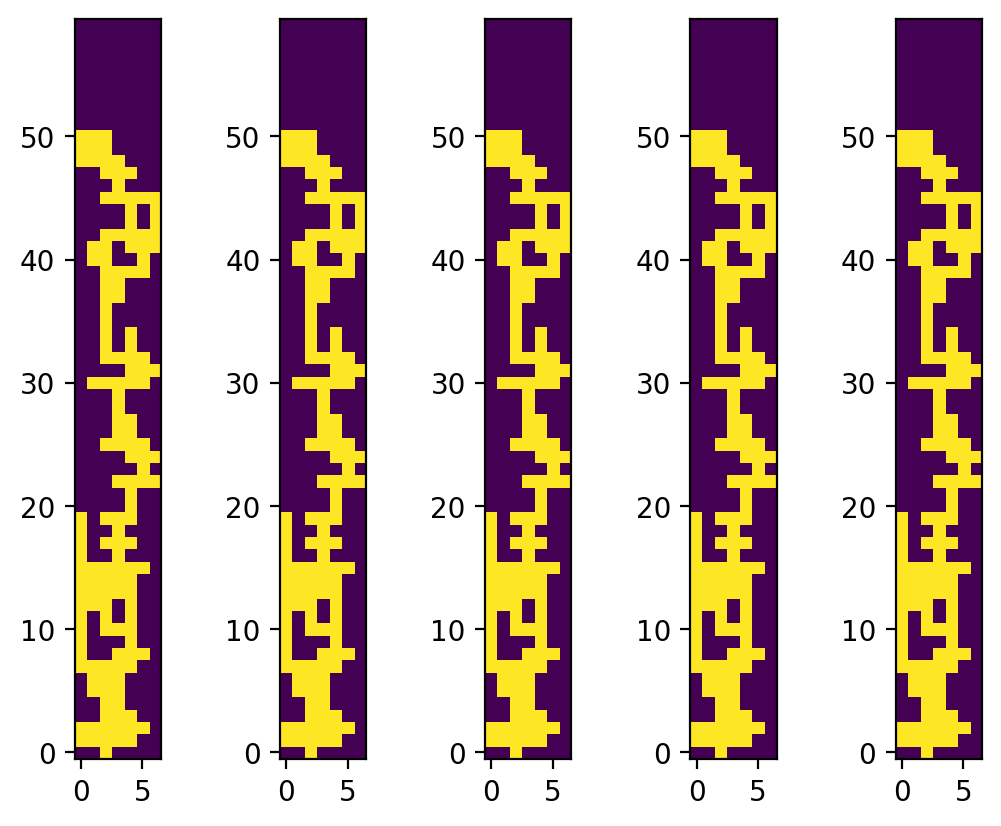

In [394]:
vent=None
fig,ax = plt.subplots(1,5)
ycycles = []
Ns = []
rock=None
for k in range(5):
    vent,Ncycle,rock = playTetris(200000,piecesstr,wind,repeatwind=False,Vent=vent,rock=rock)
    ycycle = vent.ymax()
    ycycles.append(ycycle)
    Ns.append(Ncycle)
    playzone = np.zeros((60,7),dtype=bool)
    itrelem = list(vent.elements)
    for v in itrelem:
        if v.y>=ycycle-50:
            playzone[v.y-ycycle+50,v.x] = 1
        else:
            vent.elements.remove(v)

    ax[k].imshow(playzone,origin="lower")

In [395]:
ycycles[0],np.diff(ycycles)

(2658, array([2647, 2647, 2647, 2647]))

In [396]:
Ns[0],np.diff(Ns)

(1715, array([-5,  0,  0,  0]))

In [397]:
vent=None
ycycles = []
Ns = []
rock=None
for k in range(2):
    vent,Ncycle,rock = playTetris(2000,piecesstr,wind,repeatwind=False,Vent=vent,rock=rock)
    ycycle = vent.ymax()
    ycycles.append(ycycle)
    Ns.append(Ncycle)
    playzone = np.zeros((60,7),dtype=bool)
    itrelem = list(vent.elements)
    for v in itrelem:
        if v.y>=ycycle-50:
            playzone[v.y-ycycle+50,v.x] = 1
        else:
            vent.elements.remove(v)

firstcycle = Ns[0]
genericcycle = Ns[1]
firsty = ycycles[0]
genericy = ycycles[1]-firsty

totcycles = (Ntwo-firstcycle)//genericcycle
finalN = (Ntwo-firstcycle)%genericcycle
ybefore = vent.ymax()
vent,Ncycle,rock = playTetris(finalN,piecesstr,wind,repeatwind=False,Vent=vent,rock=rock)
finaly = vent.ymax()-ybefore

In [398]:
firsty+ genericy*totcycles+finaly

1547953216393